In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

SIMULATION_FOLDER = "C:\\Users\\Admin\\OneDrive - Politecnico di Milano\\phd\\code\\multivariate_hawkes\\data\\simulations"

In [ ]:
path = Path(SIMULATION_FOLDER)
method_simulation_subdirs = [
    d
    for d in path.rglob("")
    if d.is_dir() and not any(child.is_dir() for child in d.iterdir())
]

dfs_list = []
for method_simulation_subdir in method_simulation_subdirs:
    params = method_simulation_subdir.parts[-4:-1]

    dfs = []
    for file in method_simulation_subdir.glob("orderbook_changes_*.tsv"):
        df = pd.read_csv(file, sep="\t")
        df["previous"] = df["real"].shift(1)
        if params[0][0:3] == "mul":
            df["predicted_truncated"] = df[["predicted", "previous"]].apply(
                lambda x: (
                    x["predicted"]
                    if x["predicted"] < (x["previous"] + 5)
                    else (x["previous"] + 5)
                ),
                axis=1,
            )
        else:
            df["predicted_truncated"] = df["predicted"]
        dfs.append(df)

    df = pd.concat(dfs)
    df["error"] = (df["real"] - df["predicted"]).abs()
    df["error_truncated"] = (df["real"] - df["predicted_truncated"]).abs()
    df["error_relative"] = (
        (df["predicted"] - df["previous"]) / (df["real"] - df["previous"])
    ).abs()
    df["error_relative_truncated"] = (
        (df["predicted_truncated"] - df["previous"]) / (df["real"] - df["previous"])
    ).abs()
    df["method"] = params[0][0:3]
    df["pair"] = params[1]
    df["param"] = params[2][-3:]

    dfs_list.append(df)

df = pd.concat(dfs_list)
df["method_param"] = df["method"] + "_" + df["param"]
df = df.reset_index(drop=True)
df.head()

,real,predicted,previous,predicted_truncated,error,error_truncated,error_relative_truncated,method,pair,param,method_param
0,0.029,1.025120,NaN,1.025120,0.996120,0.996120,NaN,mov,BTC_USD,120,mov_120
1,0.242,1.251409,0.029,1.251409,1.009409,1.009409,5.739008,mov,BTC_USD,120,mov_120
2,0.461,1.453670,0.242,1.453670,0.992670,0.992670,5.532741,mov,BTC_USD,120,mov_120
3,0.677,1.662221,0.461,1.662221,0.985221,0.985221,5.561209,mov,BTC_USD,120,mov_120
4,0.894,1.867958,0.677,1.867958,0.973958,0.973958,5.488287,mov,BTC_USD,120,mov_120


In [ ]:
df[df["method"] == "mul"]

In [4]:
table_results = (
    df[["error_relative_truncated", "method", "param", "pair"]]
    .groupby(["pair", "method", "param"])
    .median()
    .reset_index()
    .sort_values(["pair", "error_relative_truncated"], ascending=[True, True])
)

table_results["method"] = table_results["method"].map(
    {
        "mul": "Multivariate Hawkes",
        "mov": "Moving Average",
        "uni": "Univariate Hawkes",
        "nai": "Naive",
        "poi": "Poisson",
    }
)
table_results["param"] = table_results["param"].str.replace(r"\D", "", regex=True)

table_results.to_csv(
    "C:\\Users\\Admin\\OneDrive - Politecnico di Milano\\phd\\code\\multivariate_hawkes\\images\\multivariate_attempts\\table_results.tsv",
    sep="\t",
)

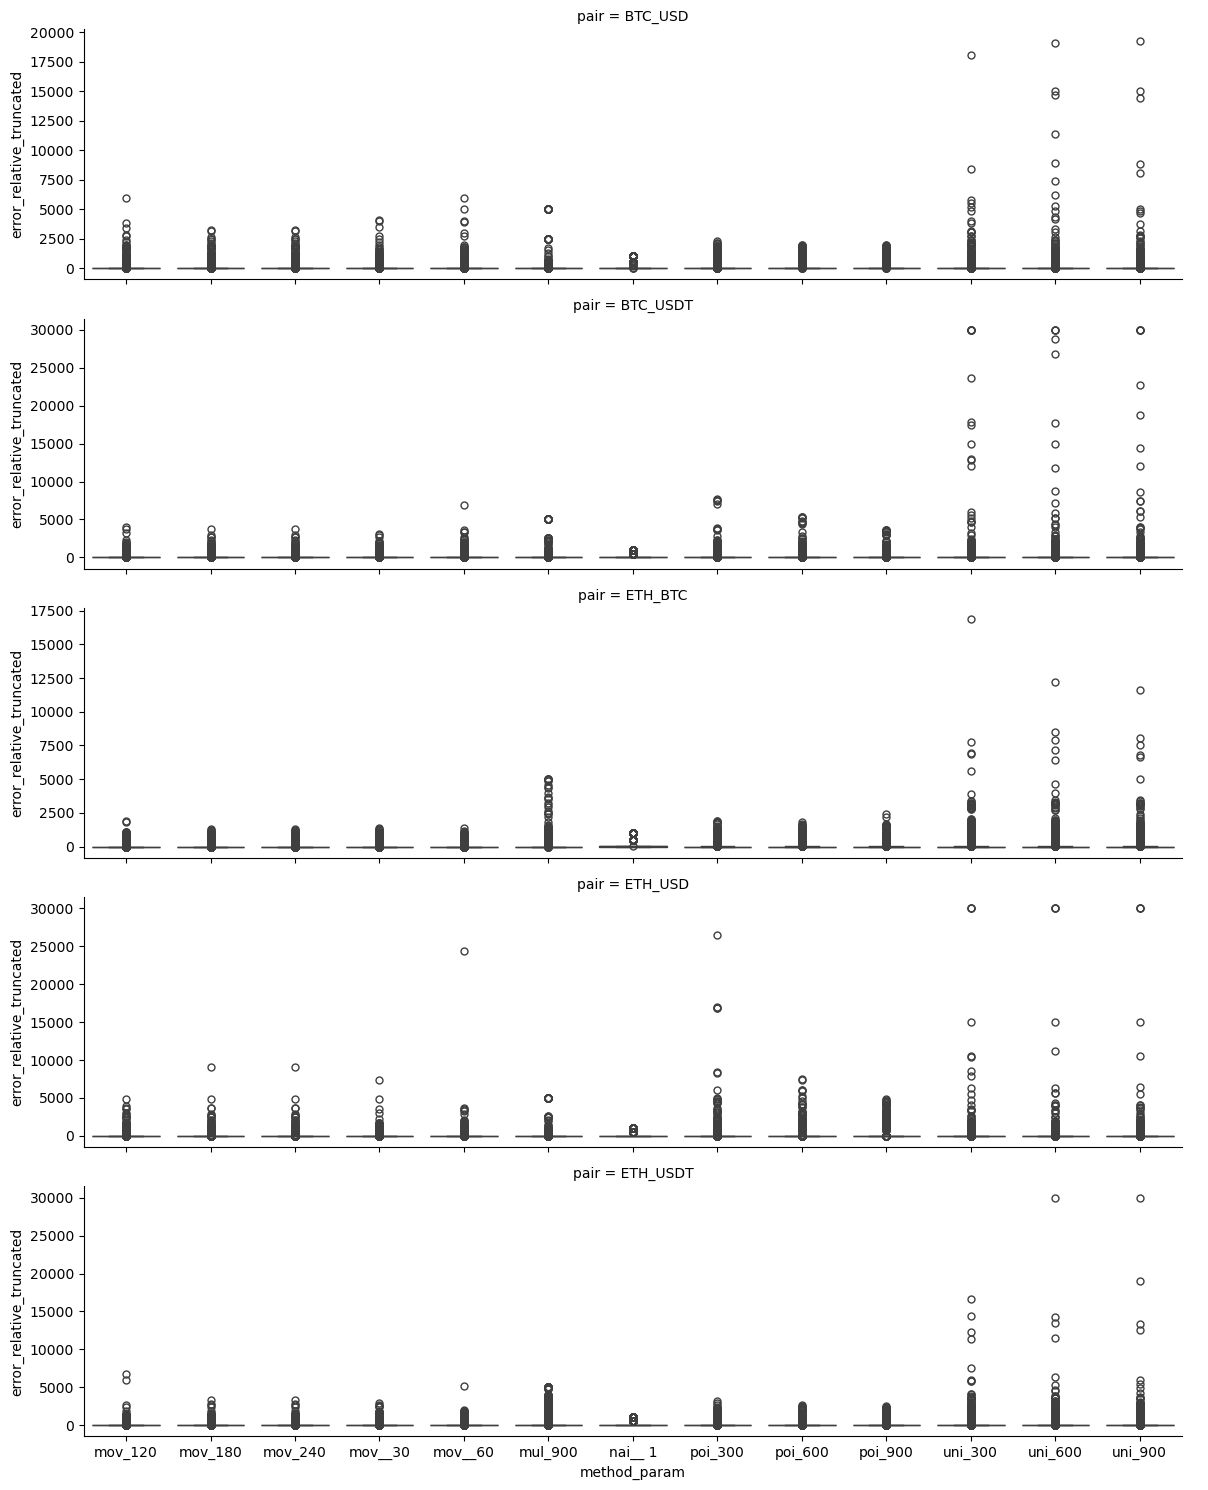

In [5]:
# Create a boxplot with 'method_param' on the x-axis, 'error' on the y-axis, and separate plots by 'pair'
unique_methods = df["method_param"].unique()
# colors = ['red'] * 5 + ['blue'] * 3 + ['pink'] + ['yellow'] * 3 + ['green'] * 3

# palette = dict(zip(unique_methods, colors))
sns.catplot(
    x="method_param",
    y="error_relative_truncated",
    row="pair",
    data=df,
    kind="box",
    height=3,
    aspect=4,
    sharey=False,  # palette=palette
)

# Show the plot
plt.show()

In [ ]:
(
    df_pair[["method", "error_relative_truncated", "method_param"]]
    .groupby(["method", "method_param"])
    .median()
    .sort_values("error_relative")
    .reset_index()
    .drop_duplicates("method", keep="first")
)

C:\Users\Admin\AppData\Local\Temp\ipykernel_18232\2827568282.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


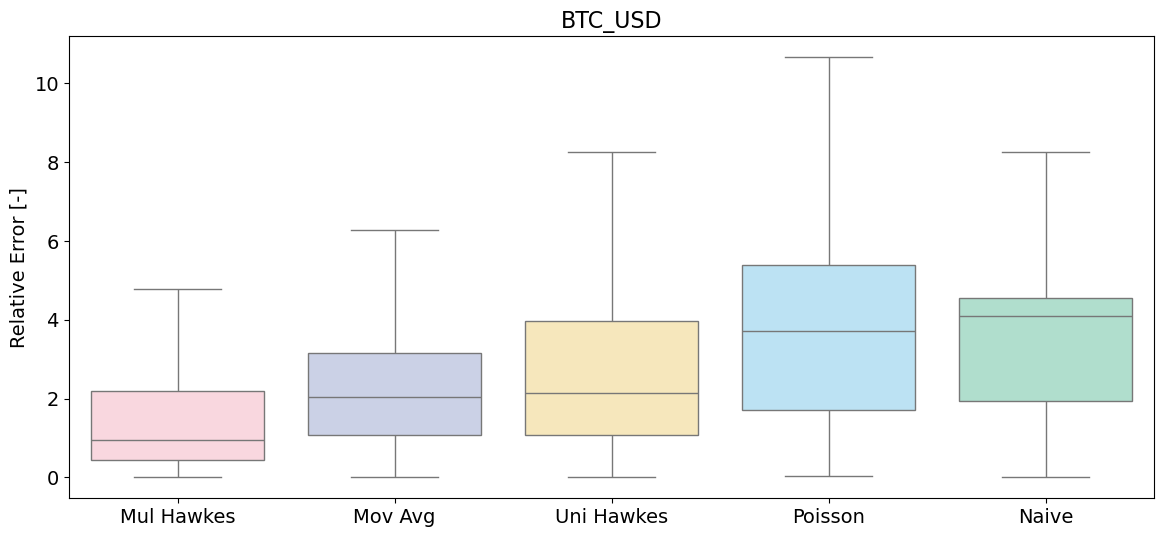

C:\Users\Admin\AppData\Local\Temp\ipykernel_18232\2827568282.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


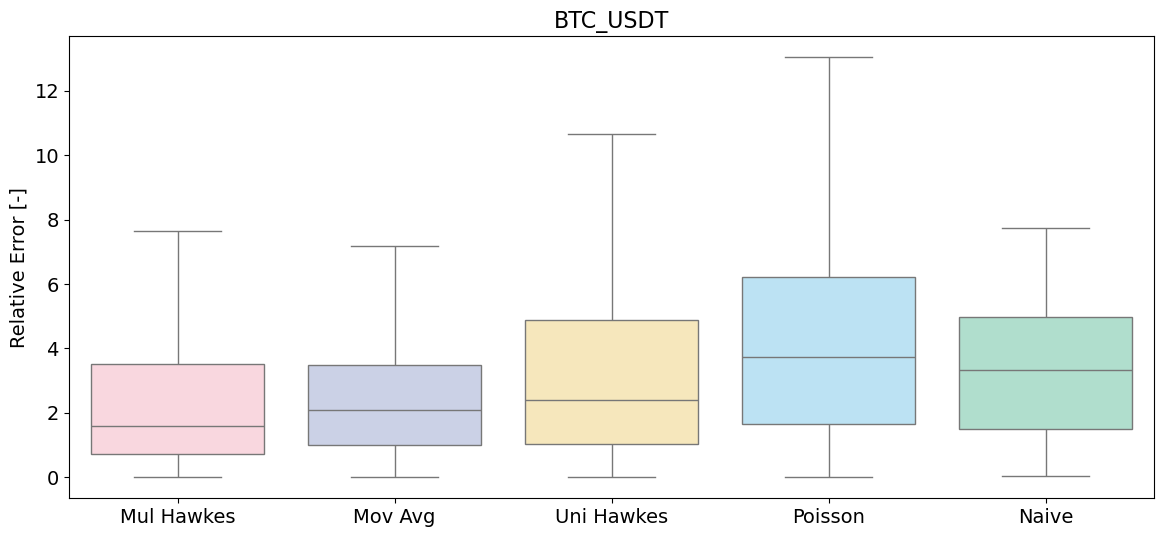

C:\Users\Admin\AppData\Local\Temp\ipykernel_18232\2827568282.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


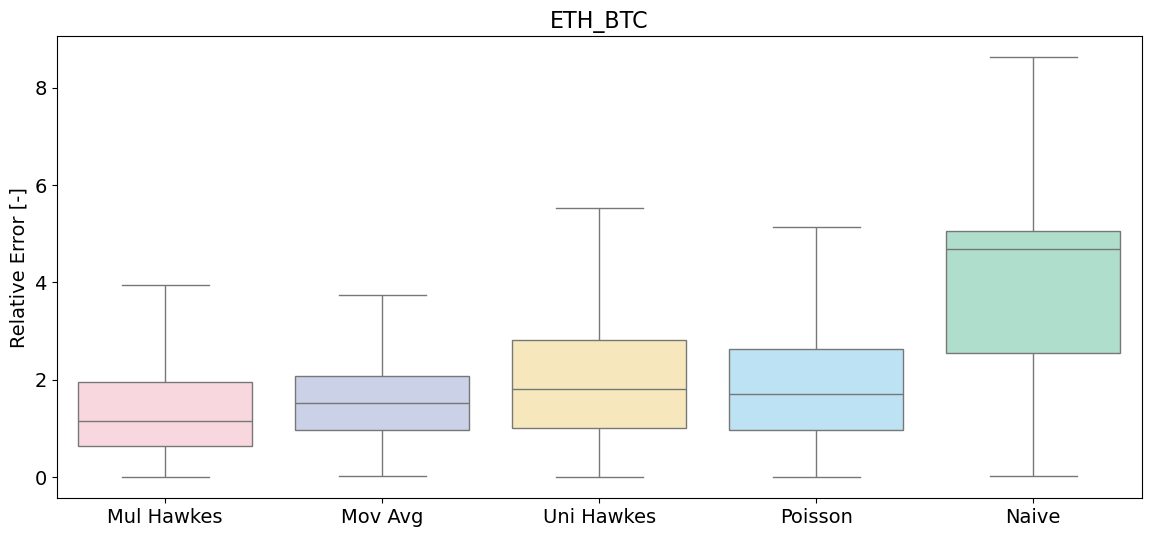

C:\Users\Admin\AppData\Local\Temp\ipykernel_18232\2827568282.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


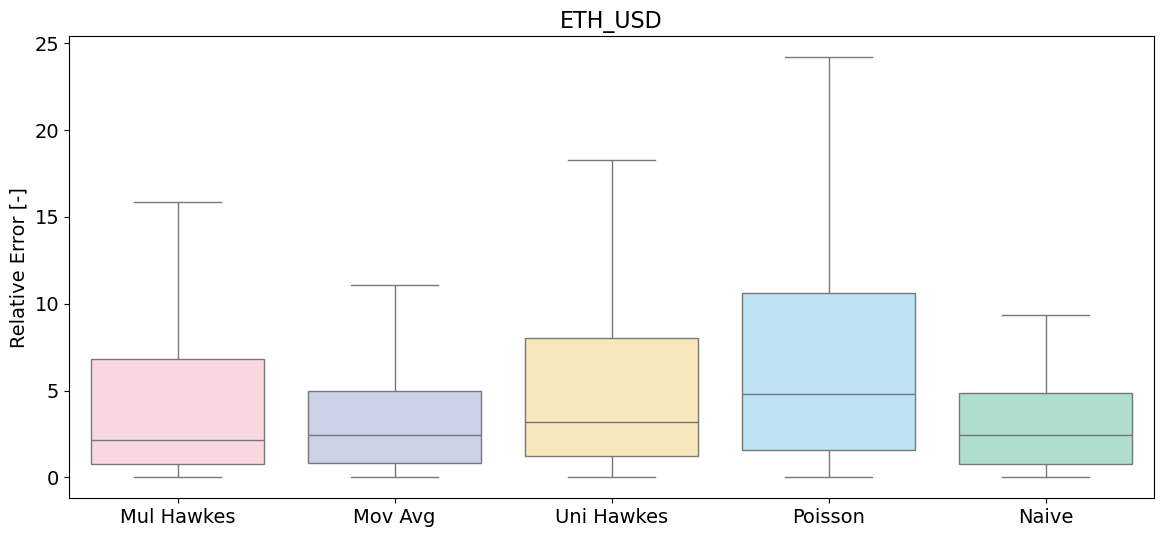

C:\Users\Admin\AppData\Local\Temp\ipykernel_18232\2827568282.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


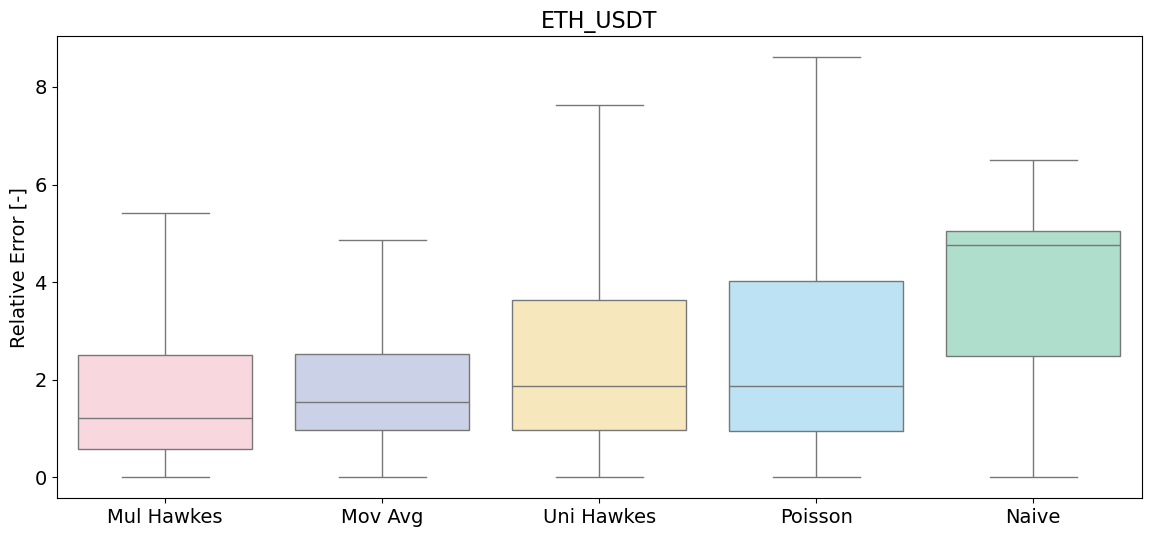

In [6]:
# Create a boxplot with 'method_param' on the x-axis, 'error' on the y-axis, and separate plots by 'pair'

for pair in df["pair"].unique():
    df_pair = df[df["pair"] == pair].copy()

    best_method_params_for_each_method = (
        df_pair[["method", "error_relative_truncated", "method_param"]]
        .groupby(["method", "method_param"])
        .median()
        .sort_values("error_relative_truncated")
        .reset_index()
        .drop_duplicates("method", keep="first")
    )

    df_pair = df_pair.merge(
        best_method_params_for_each_method[["method_param", "method"]],
        on=["method_param", "method"],
        how="inner",
    )

    df_pair["method"] = df_pair["method"].map(
        {
            "mul": "Mul Hawkes",
            "mov": "Mov Avg",
            "uni": "Uni Hawkes",
            "nai": "Naive",
            "poi": "Poisson",
        }
    )

    unique_methods = df_pair["method"].sort_values().unique()
    colors = (
        ["#C7CEEA"] * 1
        + ["#FFD1DC"] * 1
        + ["#A8E6CF"]
        + ["#B3E5FC"] * 1
        + ["#FFECB3"] * 1
    )

    palette = dict(zip(unique_methods, colors))
    plt.figure(figsize=(14, 6))
    sns.boxplot(
        x="method",
        y="error_relative_truncated",
        data=df_pair,
        showfliers=False,
        palette=palette,
        order=["Mul Hawkes", "Mov Avg", "Uni Hawkes", "Poisson", "Naive"],
    )

    # increase the size of the font
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # increase the size of the font for title
    plt.title(pair, fontsize=16)

    plt.xlabel("")
    plt.ylabel("Relative Error [-]", fontsize=14)
    plt.show()

In [ ]:
unique_counts = (
    df.groupby(["pair", "method"])["param"].nunique().reset_index(name="num_params")
)


# Create the catplot without showing it initially


g = sns.catplot(
    x="param",
    y="error",
    row="pair",
    col="method",
    data=df,
    kind="box",
    height=1,
    aspect=2,
    sharey=True,
    sharex=False,
    showfliers=False,
)

plt.show()

idee: 
- trainare meglio multivariate per beta (BO, GA, particle swarm?)
- provare non prendendo periodi con piu secondi con piu eventi, ma abbastanza a caso (perchè con i primi non è detto che distribuzione training = distribuzione testing. Nemmeno con i secondi, però a sto punto tanto vale togliere assumpion. Anzi con i primi è piu difficile che distribuzione training = distribuzione testing). (possibili limiti tipo quando non c'è nessun evento?)
- si puo mettere qualcosina di automatica stile paper richi? visto che la sto studiando per esercitazioni